# Crime and Park Data Exploration

This is a jupyter notebook where we explore the park and crime datasets after they where properly cleaned. 
The datasets that contain information about green areas in Italy are:

- _urban_green_area_city_capitals_2011_2021_density_
- _urban_green_area_city_capitals_2011_2021_m2_
- _availability_of_usable_urban_green_space_city_capitals_2011_2021_m2_per_inhabitant_
- _availability_of_usable_urban_green_space_city_capitals_2011_2021_m2_

The dataset that contain information about crimes in Italy is:

- _individuals_reported_and_arrested_or_detained_by_police_forces_2004_2022_ISTAT_

The notebook contains both exploration of the single year and evoultion in time for the green park and crime situation in Italy. 



## Python Packages

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn
import geopandas as gpd
import os

## Dataset Loading
The name of the datasets (after the cleaning script has been executed) are by default defined as in the next cell. 

<font color='red'>If you change the filenames here in the notebook, you have to re-run the **data_cleaning.py** script with the same filenames</font>


### Default dataset filenames

In [33]:
urban_green_availability_m2_filename = "availability_of_usable_urban_green_space_city_capitals_2011_2021_m2.csv"
urban_green_availability_m2_per_inhabitant_filename = "availability_of_usable_urban_green_space_city_capitals_2011_2021_m2_per_inhabitant.csv"
urban_green_area_m2_filename = "urban_green_area_city_capitals_2011_2021_m2.csv"
urban_green_area_density_filename = "urban_green_area_city_capitals_2011_2021_density.csv"
crime_filename = "individuals_reported_and_arrested_or_detained_by_police_forces_2004_2022_ISTAT.csv"

### From csv to pandas dataframe

In [34]:
# path where are stored the pre-processed park and crime datasets
path_in =  os.path.join(os.path.abspath(""), os.path.join("..", "data/parks_and_crime/clean"))

crime_df = pd.read_csv(os.path.join(path_in, crime_filename), index_col=[0])
urban_green_availability_m2_df = pd.read_csv(os.path.join(path_in, urban_green_availability_m2_filename))
urban_green_availability_m2_per_inhabitant_df = pd.read_csv(os.path.join(path_in, urban_green_availability_m2_per_inhabitant_filename))
urban_green_area_m2_df = pd.read_csv(os.path.join(path_in, urban_green_area_m2_filename))
urban_green_area_density_df = pd.read_csv(os.path.join(path_in, urban_green_area_density_filename))


## Italy shapely files

These files contain the geometric information of all the italian provincies. 
Using these information it is possible to plot a map of Italy with the correct borders

In [35]:
# year that will be selected for the visualization
year = "2021"

# path of the shapley files
path_shp = os.path.join(os.path.abspath(""), os.path.join("..", "data/italy_provinces_shp_files"))

# shp file name
shp_file = os.path.join(path_shp, os.path.join(year, "Prov"+year+"_g_WGS84.shp"))
print(shp_file)

# load the shp file
gdf = gpd.read_file(shp_file)
print(gdf.head())

/workspaces/italian-green-vs-crime-analysis/notebook/../data/italy_provinces_shp_files/2021/Prov2021_g_WGS84.shp
   COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  DEN_PROV  DEN_CM   DEN_UTS  \
0        1        1         1     201      201         -  Torino    Torino   
1        1        1         2       0        2  Vercelli       -  Vercelli   
2        1        1         3       0        3    Novara       -    Novara   
3        1        1         4       0        4     Cuneo       -     Cuneo   
4        1        1         5       0        5      Asti       -      Asti   

  SIGLA             TIPO_UTS     Shape_Leng    Shape_Area  \
0    TO  Citta metropolitana  539249.811270  6.828137e+09   
1    VC            Provincia  418078.067821  2.082097e+09   
2    NO            Provincia  250242.112077  1.341318e+09   
3    CN            Provincia  490111.881318  6.898443e+09   
4    AT            Provincia  315563.261771  1.508947e+09   

                                            geometr

## Parks dataset exploration

In [36]:
### Selecting the park data by year
urban_green_availability_m2_df_select = urban_green_availability_m2_df[["cities", year]]
urban_green_availability_m2_per_inhabitant_df_select = urban_green_availability_m2_per_inhabitant_df[["cities", year]]
urban_green_area_m2_df_select = urban_green_area_m2_df[["cities", year]]
urban_green_area_density_df_select = urban_green_area_density_df[["cities", year]]

### Merging the park data with the shp data

In [37]:
# urban_green_availability_m2 dataset
urban_green_availability_m2_gdf_temp1 = gdf.merge(urban_green_availability_m2_df_select, left_on = "DEN_PROV", right_on = "cities")
urban_green_availability_m2_gdf_temp2 = gdf.merge(urban_green_availability_m2_df_select, left_on = "DEN_CM", right_on = "cities")
urban_green_availability_m2_gdf = pd.concat([urban_green_availability_m2_gdf_temp1, urban_green_availability_m2_gdf_temp2])

# urban_green_availability_m2_per_inhabitant dataset
urban_green_availability_m2_per_inhabitant_gdf_temp1 = gdf.merge(urban_green_availability_m2_per_inhabitant_df_select, left_on = "DEN_PROV", right_on = "cities")
urban_green_availability_m2_per_inhabitant_gdf_temp2 = gdf.merge(urban_green_availability_m2_per_inhabitant_df_select, left_on = "DEN_CM", right_on = "cities")
urban_green_availability_m2_per_inhabitant_gdf = pd.concat([urban_green_availability_m2_per_inhabitant_gdf_temp1, urban_green_availability_m2_per_inhabitant_gdf_temp2])

# urban_green_area_m2 dataset
urban_green_area_m2_gdf_temp1 = gdf.merge(urban_green_area_m2_df_select, left_on = "DEN_PROV", right_on = "cities")
urban_green_area_m2_gdf_temp2 = gdf.merge(urban_green_area_m2_df_select, left_on = "DEN_CM", right_on = "cities")
urban_green_area_m2_gdf = pd.concat([urban_green_area_m2_gdf_temp1, urban_green_area_m2_gdf_temp2])

# urban_green_area_density dataset
urban_green_area_density_gdf_temp1 = gdf.merge(urban_green_area_density_df_select, left_on = "DEN_PROV", right_on = "cities")
urban_green_area_density_gdf_temp2 = gdf.merge(urban_green_area_density_df_select, left_on = "DEN_CM", right_on = "cities")
urban_green_area_density_gdf = pd.concat([urban_green_area_density_gdf_temp1, urban_green_area_density_gdf_temp2])

<Axes: title={'center': 'Urban green density'}>

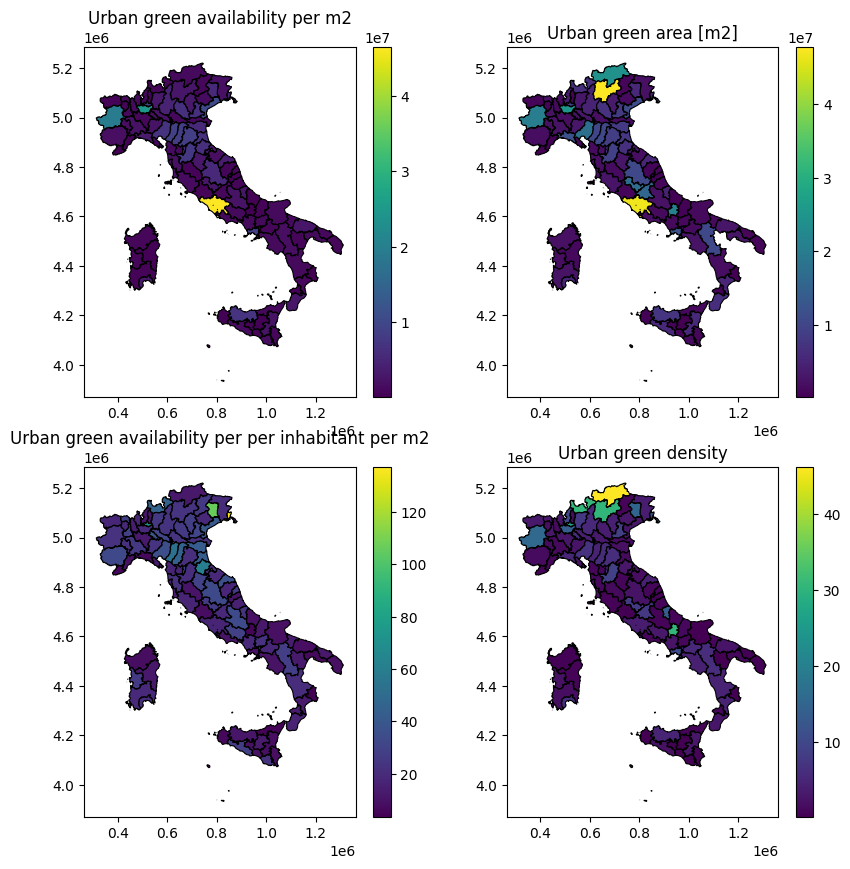

In [51]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].set_title("Urban green availability per m2")
ax[0,1].set_title("Urban green area [m2]")
ax[1,0].set_title("Urban green availability per per inhabitant per m2")
ax[1,1].set_title("Urban green density")

urban_green_availability_m2_gdf.plot(column=year, cmap='viridis', linewidth=0.8, ax=ax[0,0], edgecolor='k', legend=True)
urban_green_area_m2_gdf.plot(column=year, cmap='viridis', linewidth=0.8, ax=ax[0,1], edgecolor='k', legend=True)
urban_green_availability_m2_per_inhabitant_gdf.plot(column=year, cmap='viridis', linewidth=0.8, ax=ax[1,0], edgecolor='k', legend=True)
urban_green_area_density_gdf.plot(column=year, cmap='viridis', linewidth=0.8, ax=ax[1,1], edgecolor='k', legend=True)

## Crime dataset exploration